### Short strangle with delta hedging

https://zerodha.com/varsity/chapter/the-long-short-strangle/

Coming to the reality we can't predict market accurately and it may lead to loss.<br/>
So in practice market neutral strategies are very helpful and can give decent returns with very less risk<br/>
One such strategy is to sell put and call options such that the overall delta of our positions remains 0.

Try to code the above strategy and manage delta just like given in the previous strategy.<br/>
You will only use 46500 puts and calls for this strategy.<br/>
Initially sell 10 lots of puts and correspondingly sell x lots of calls such that the delta becomes 0.<br/>
Then manage the delta accordingly by just selling or buying call options and not changing the number of put options sold.<br/>
Also plot the profit graph on whole data and see the results!<br/>

Hint: Do remember that unlike futures which has delta of 1 delta of 46500 puts options would change everytime.

## Importing important libraries

In [151]:
!pip install py_vollib

In [152]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from datetime import datetime

import warnings
warnings.filterwarnings("ignore")

# to fetch data
import yfinance as yf

import scipy.stats as ss

import py_vollib.black_scholes.greeks.analytical as derivatives

import math

### Initialising everything required to calculate delta

In [153]:
df_call_46500 = pd.read_csv('/content/46500CE_Quote-FAO-BANKNIFTY-01-12-2023-to-12-01-2024.csv')
df_call_46500.head()

,DATE,EXPIRY DATE,OPTION TYPE,STRIKE PRICE,OPEN PRICE,HIGH PRICE,LOW PRICE,CLOSE PRICE,LAST PRICE,SETTLE PRICE,Volume,VALUE,PREMIUM VALUE,OPEN INTEREST,CHANGE IN OI
0,28-Dec-23,28-Dec-23,CE,46500.0,2028.30,2160.70,1880.05,2014.80,2013.90,48508.55,94515.0,4.585804e+09,1.908562e+08,74715.0,-29970.0
1,27-Dec-23,28-Dec-23,CE,46500.0,1376.50,1935.45,1376.50,1858.75,1866.75,1858.75,70740.0,3.403346e+09,1.139364e+08,104685.0,-16905.0
2,26-Dec-23,28-Dec-23,CE,46500.0,1090.60,1480.00,1000.00,1328.65,1381.95,1328.65,165405.0,7.901925e+09,2.105927e+08,121590.0,-14370.0
3,22-Dec-23,28-Dec-23,CE,46500.0,1534.00,1810.05,1024.60,1108.95,1069.30,1108.95,128235.0,6.136140e+09,1.732129e+08,135960.0,-7455.0
4,21-Dec-23,28-Dec-23,CE,46500.0,899.85,1760.20,688.65,1644.70,1634.25,1644.70,812460.0,3.857936e+10,7.999654e+08,143415.0,5535.0


In [154]:
df_put_46500 = pd.read_csv('/content/46500PE_Quote-FAO-BANKNIFTY-01-12-2023-to-12-01-2024.csv')
df_put_46500.head()

,DATE,EXPIRY DATE,OPTION TYPE,STRIKE PRICE,OPEN PRICE,HIGH PRICE,LOW PRICE,CLOSE PRICE,LAST PRICE,SETTLE PRICE,Volume,VALUE,PREMIUM VALUE,OPEN INTEREST,CHANGE IN OI,Unnamed: 15
0,28-Dec-23,28-Dec-23,PE,46500.0,4.25,4.75,0.05,0.15,0.05,48508.55,60647280.0,2.820274e+12,1.755733e+08,1891635.0,-314340.0,NaN
1,27-Dec-23,28-Dec-23,PE,46500.0,9.00,9.55,4.90,7.25,8.10,7.25,36353625.0,1.690708e+12,2.640192e+08,2205975.0,130230.0,NaN
2,26-Dec-23,28-Dec-23,PE,46500.0,37.80,45.35,10.90,14.50,11.05,14.50,19994145.0,9.301659e+11,4.382052e+08,2075745.0,687510.0,NaN
3,22-Dec-23,28-Dec-23,PE,46500.0,46.00,91.05,33.85,53.40,45.50,53.40,19052745.0,8.869209e+11,9.682616e+08,1388235.0,-41475.0,NaN
4,21-Dec-23,28-Dec-23,PE,46500.0,160.05,253.00,46.35,52.10,49.00,52.10,26333130.0,1.227530e+12,3.039253e+09,1429710.0,662625.0,NaN


### Initialising everything required to calculate delta

In [155]:
symbol = '^NSEBANK'
end = '2023-12-29'
start = '2023-12-01'


# Read data
df = yf.download(symbol,start,end)

df.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-12-01,44580.148438,44951.101562,44531.750000,44814.199219,44814.199219,204900
2023-12-04,45671.500000,46484.449219,45484.199219,46431.398438,46431.398438,311200
2023-12-05,46895.898438,47230.550781,46653.648438,47012.250000,47012.250000,326100
2023-12-06,47256.750000,47259.851562,46750.199219,46834.550781,46834.550781,244200
2023-12-07,46735.398438,46927.699219,46507.148438,46841.398438,46841.398438,208100


### Calculation of annual volatility and time remainig for expiry used in calculation of delta

In [156]:
symbol = '^NSEBANK'
end = '2023-12-01'
start = '2022-12-01'


# Read data
#You need to read the from the files provided on NSE Bank for the time given above.
df_year = yf.download(symbol,start,end)
df_year.tail()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-11-23,43452.750000,43649.648438,43451.351562,43577.500000,43577.500000,72300
2023-11-24,43607.351562,43806.500000,43566.148438,43769.101562,43769.101562,96800
2023-11-28,43851.550781,43960.300781,43739.800781,43880.949219,43880.949219,151200
2023-11-29,44081.750000,44630.351562,44003.449219,44566.449219,44566.449219,152300
2023-11-30,44711.199219,44764.800781,44254.601562,44481.750000,44481.750000,343200


In [157]:
ret = df_year['Close'].pct_change()[1:]
ret.head()

Date
2022-12-02   -0.003627
2022-12-05    0.005317
2022-12-06   -0.004486
2022-12-07   -0.000924
2022-12-08    0.011558
Name: Close, dtype: float64

In [158]:
daily_vol = ret.std()

vol = daily_vol * (252**(0.5))
vol

0.1264829243225371

In [159]:
expiry = datetime.strptime('2023-12-28', '%Y-%m-%d')   #Expiry date
time_left = expiry-df.index    #Time left in days
time = time_left.days
time

Int64Index([27, 24, 23, 22, 21, 20, 17, 16, 15, 14, 13, 10, 9, 8, 7, 6, 2, 1,
            0],
           dtype='int64', name='Date')

# Implementing Strategy

In [160]:
#Assume we are starting the strategy at the opening time of 1st Dec
S = df['Open'][0]  #price of the underlying
K = 46500   #strike price
t = time[0]/365 #time left to expiry in years
sigma = vol #volatility
r = 0.06 #risk free rate
delta_to_maintain = 0

### Initial selling

In [161]:
no_of_lots_put = 10      #number of lots of put sold
sell_avg_put =  df_put_46500['OPEN PRICE '][0] #selling average of selling those lots
lot_size = 25
delta = derivatives.delta('p', S, K, t, r, sigma) * no_of_lots_put * lot_size  #total delta after selling 250 quantities of put

In [162]:
delta

-214.95120376836874

In [163]:
delta_per_lot_call = derivatives.delta('c', S, K, t, r, sigma) * lot_size  #delta per lot of call,i.e, delta of 25 quantities
delta_per_lot_call

3.504879623163127

In [164]:
number_of_lots_call =  math.ceil((delta_to_maintain - delta)/delta_per_lot_call)   #number of lots of call to be sold
number_of_lots_call

62

In [165]:
sell_avg_call = df_call_46500['OPEN PRICE '][0]  #selling average of that call options sold
sell_avg_call

2028.3

In [166]:
#Before delta management ans few questions:

#Q1. If market moves up, what would happen to delta of put options? (increase/decrease)
#Ans : Decrease

#Q2. If market moves up, what would happen to delta of call options? (increase/decrease)
#Ans : Decrease

#Q3. What would be your ideal strategy in terms of buying/selling call options if market moves up to maintain a delta of 0.
#Ans : Sell Call Options

'''
Bonus Question: Assume that you have set a limit to selling of your quantities and you have reached that limit of yours.
Now the market went up. You have to manage your delta such that the final quantity sold by you remains the same.
What would you do?
Hint : Think about changing the strikes of options

Ans : Increase Strike price so that Delta becomes zero.
'''

'\nBonus Question: Assume that you have set a limit to selling of your quantities and you have reached that limit of yours.\nNow the market went up. You have to manage your delta such that the final quantity sold by you remains the same.\nWhat would you do?\nHint : Think about changing the strikes of options\n\nAns : Increase Strike price so that Delta becomes zero.\n'

### Delta Management

In [167]:
number_of_lots_call = math.ceil((delta_to_maintain - delta)/delta_per_lot_call)  #number of call lots to be sold(same as above)
sell_avg_call =  df_call_46500['OPEN PRICE '][0]  #selling average(same as above)
profit = []

for i in range(len(df)-1):
    delta = derivatives.delta('p', df['Close'][i], K, time[i]/365, r, sigma) * no_of_lots_put * lot_size
    delta_per_lot_call = derivatives.delta('c', df['Close'][i], K, time[i]/365, r, sigma) * lot_size  #Calculate delta per lot at the next closing day
    current_number_of_lots_call = math.ceil((delta_to_maintain - delta)/delta_per_lot_call) #number of lots required to sell
    no_of_lots_added =  current_number_of_lots_call - number_of_lots_call #number of lots added/subtracted for selling
    sell_avg_call = (sell_avg_call*number_of_lots_call + no_of_lots_added*df_call_46500['CLOSE PRICE '][i]) / current_number_of_lots_call #new selling avg of call
    number_of_lots_call = current_number_of_lots_call #update number of lots of calls sold

    profit.append((sell_avg_put - df_put_46500['CLOSE PRICE '][i]) * no_of_lots_put * lot_size + (sell_avg_call-df_call_46500['CLOSE PRICE '][i]) * lot_size * number_of_lots_call) #unrealised profit


In [168]:
#profit.append((sell_avg_put - df_put_46500['CLOSE PRICE '][len(df)-1]) * no_of_lots_put * lot_size + (sell_avg_call - df_call_46500['CLOSE PRICE '][len(df)-1]) * lot_size * number_of_lots_call)
 #profit at the expiry as at expiry delta is not done and therefore cannot be calculated in the above loop

In [169]:
profit

[21949.999999999887,
 203533.74999999983,
 320993.7499999998,
 338731.2499999999,
 258693.74999999983,
 326403.7499999999,
 299756.24999999977,
 296737.4999999999,
 270842.4999999999,
 283347.4999999999,
 289379.9999999999,
 273662.4999999999,
 274949.9999999999,
 274861.2499999998,
 252261.24999999988,
 239637.49999999988,
 245252.49999999988,
 206882.49999999988]

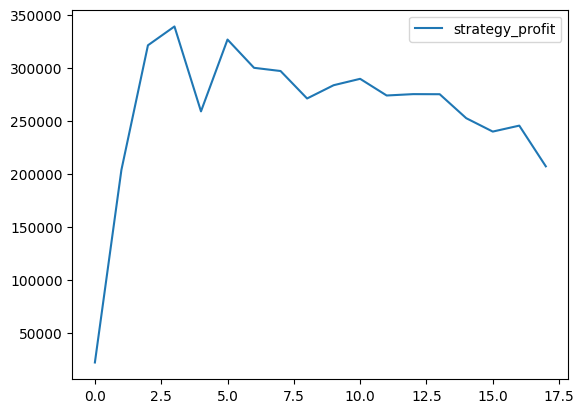

In [170]:
#profit graph
plt.plot(profit, label = 'strategy_profit')
plt.legend()

See the results you get by selling calls and puts and just managing delta at end of day